#Paquetes necesarios

In [3]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Realiza la cuenta de píxeles blancos por filas, determina el máximo para filas y columnas (uno para cada) y muestra el número de valores que superan en cada caso 0.95*máximo.

[0.18359375 0.20898438 0.19921875 0.203125   0.234375   0.19726562
 0.203125   0.20507812 0.21289062 0.18945312 0.21484375 0.19726562
 0.18554688 0.2109375  0.17382812 0.1875     0.20703125 0.22265625
 0.20117188 0.203125   0.1953125  0.21484375 0.20117188 0.21484375
 0.23632812 0.20898438 0.2421875  0.23242188 0.20898438 0.21875
 0.20898438 0.21875    0.21679688 0.234375   0.20507812 0.24804688
 0.23242188 0.23242188 0.22460938 0.22265625 0.21289062 0.22265625
 0.23828125 0.21484375 0.21289062 0.234375   0.27734375 0.265625
 0.265625   0.25390625 0.28515625 0.2890625  0.2890625  0.27539062
 0.30078125 0.31640625 0.30859375 0.30859375 0.32226562 0.31054688
 0.33398438 0.34179688 0.31835938 0.328125   0.3203125  0.29882812
 0.27734375 0.33789062 0.31054688 0.3046875  0.33007812 0.29101562
 0.3359375  0.28515625 0.30078125 0.32617188 0.33007812 0.30078125
 0.296875   0.30273438 0.32617188 0.29492188 0.30273438 0.3125
 0.33007812 0.29492188 0.3515625  0.33398438 0.3515625  0.3359375
 0.34

(0.0, 512.0)

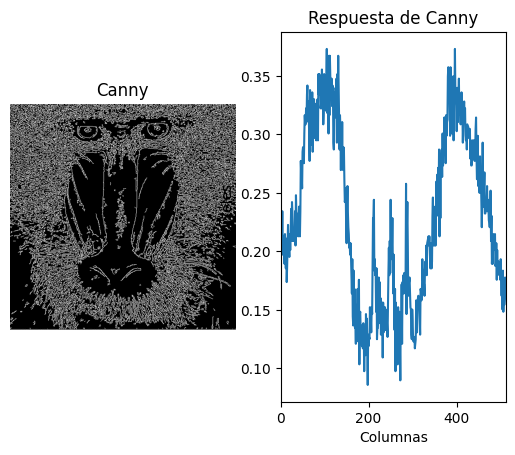

In [18]:
img = cv2.imread('mandril.jpg') 
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris, 100, 200)
#Si muestras el contenido de la imagen resultado, son valores 0 o 255
#print(canny)
#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#print(col_counts)

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * canny.shape[1])

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])

(0.0, 512.0)

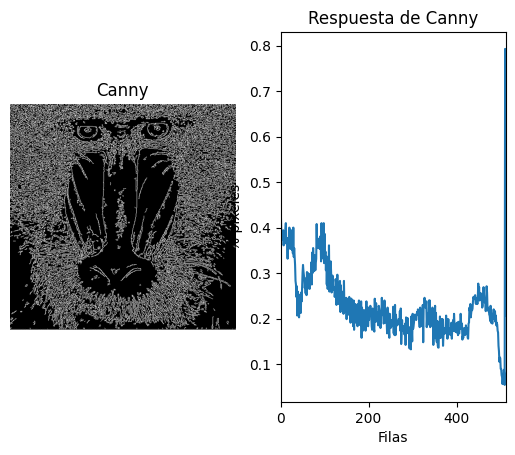

In [5]:
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
rows = row_counts / (255 * canny.shape[0])

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])

In [7]:
colMax = 0
colMaxNum = 0
for i in range(0,len(col_counts[0])):
    if (col_counts[0][i] > colMax):
        colMax = col_counts[0][i]
        colMaxNum = i

cols95Num = 0
for i in range(0,len(col_counts[0])):
    if (col_counts[0][i] >= colMax*0.95):
        cols95Num+=1
        
rowMax = 0
rowMaxNum = 0
for i in range(0,len(row_counts)):
    if (row_counts[i] > rowMax):
        rowMax = row_counts[i]
        rowMaxNum = i

rows95Num = 0
for i in range(0,len(row_counts)):
    if (row_counts[i] >= rowMax*0.95):
        rows95Num+=1
        
print("El máximo de las columnas es en la columna: %d, y su valor es: %d. El número de columnas que pasa el 0.95 del valor máximo son: %d" % (colMaxNum, colMax, cols95Num))
print("El máximo de las filas es en la fila: %d, y su valor es: %d. El número de filas que pasa el 0.95 del valor máximo son: %d (La propia fila que es el máximo). \nEsto se debe a que la foto tiene un error de recorte, y las últimas filas son un borde negro." % (rowMaxNum, rowMax, rows95Num))

El máximo de las columnas es en la columna: 105, y su valor es: 48705. El número de columnas que pasa el 0.95 del valor máximo son: 8
El máximo de las filas es en la fila: 510, y su valor es: 103530. El número de filas que pasa el 0.95 del valor máximo son: 1 (La propia fila que es el máximo). 
Esto se debe a que la foto tiene un error de recorte, y las últimas filas son un borde negro.


C:\Users\nauze\AppData\Local\Temp\ipykernel_13376\259013515.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("El máximo de las filas es en la fila: %d, y su valor es: %d. El número de filas que pasa el 0.95 del valor máximo son: %d (La propia fila que es el máximo). \nEsto se debe a que la foto tiene un error de recorte, y las últimas filas son un borde negro." % (rowMaxNum, rowMax, rows95Num))


TAREA: Elige otra imagen, muestra el contenido de alguna de las imágenes resultado de Sobel antes y después de ajustar la escala

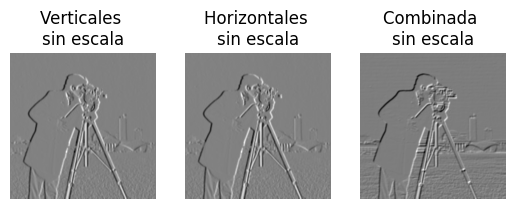

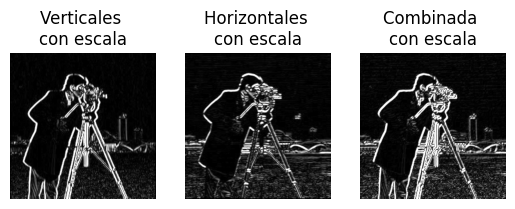

In [26]:
imgPhotographer = cv2.imread('photographer.jpg') 
grisPhotographer = cv2.cvtColor(imgPhotographer, cv2.COLOR_BGR2GRAY)

gaussianPhotographer = cv2.GaussianBlur(grisPhotographer, (3, 3), 0)

sobelx = cv2.Sobel(gaussianPhotographer, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(gaussianPhotographer, cv2.CV_64F, 0, 1)
sobel = cv2.add(sobelx, sobely)

# Plot sin la escala
plt.figure()
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title('Verticales \nsin escala')
plt.imshow(sobelx, cmap='gray')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.title('Horizontales \nsin escala')
plt.imshow(sobelx, cmap='gray')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Combinada \nsin escala')
plt.imshow(sobel, cmap='gray')

# Plot con la escala
plt.figure()
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title('Verticales \ncon escala')
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray') 

plt.subplot(1, 3, 2)
plt.axis("off")
plt.title('Horizontales \ncon escala')
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray') 

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Combinada \ncon escala')
plt.imshow(cv2.convertScaleAbs(sobel), cmap='gray') 
plt.show()



TAREA: Aplica umbralizado a la imagen resultante de Sobel (valores 0 a 255 y convertida a 8 bits por ejemplo sobel8 = np.uint8(sobel)), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny. Calcula los máximos por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

(0.0, 512.0)

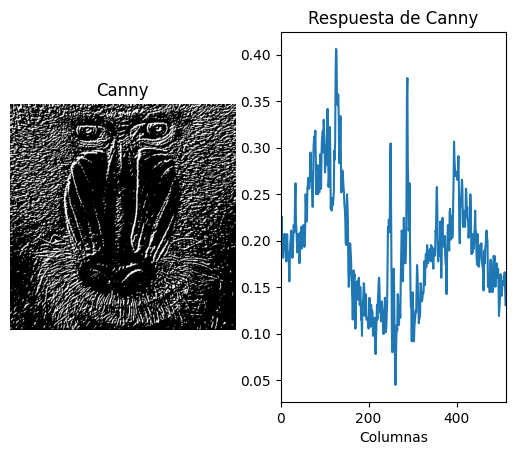

In [31]:
# Gaussiana para suavizar la imagen original
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)
#Define valor umbral
valorUmbral = 60 #Prueba otros valores
#Obtiene imagen umbralizada para dicho valor definido
res, imagenUmbralizada = cv2.threshold(sobel, valorUmbral, 255, cv2.THRESH_BINARY)


col_counts = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_64F)

#print(col_counts)

cols = col_counts[0] / (255 * imagenUmbralizada.shape[1])

plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(imagenUmbralizada, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
#Rango en x definido por las columnas
plt.xlim([0, imagenUmbralizada.shape[0]])

# colMax = 0
# colMaxNum = 0
# for i in range(0,len(col_counts[0])):
#     if (col_counts[0][i] > colMax):
#         colMax = col_counts[0][i]
#         colMaxNum = i

# cols95Num = 0
# for i in range(0,len(col_counts[0])):
#     if (col_counts[0][i] >= colMax*0.95):
#         cols95Num+=1

(0.0, 512.0)

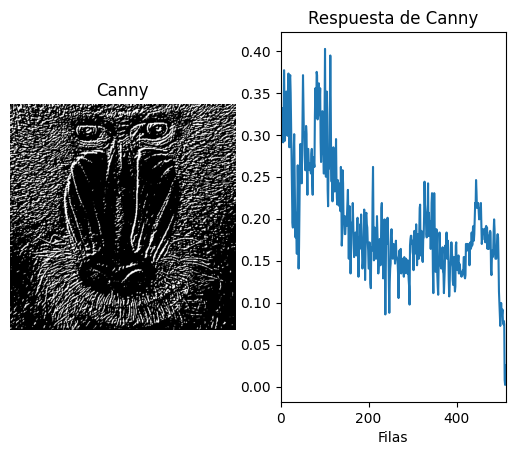

In [26]:
row_counts = cv2.reduce(imagenUmbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_64F)

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
rows = row_counts / (255 * imagenUmbralizada.shape[0])

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(imagenUmbralizada, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
#Rango en x definido por las columnas
plt.xlim([0, imagenUmbralizada.shape[0]])

In [27]:
colMax = 0
colMaxNum = 0
for i in range(0,len(col_counts[0])):
    if (col_counts[0][i] > colMax):
        colMax = col_counts[0][i]
        colMaxNum = i

cols95Num = 0
for i in range(0,len(col_counts[0])):
    if (col_counts[0][i] >= colMax*0.95):
        cols95Num+=1
        
rowMax = 0
rowMaxNum = 0
for i in range(0,len(row_counts)):
    if (row_counts[i] > rowMax):
        rowMax = row_counts[i]
        rowMaxNum = i

rows95Num = 0
for i in range(0,len(row_counts)):
    if (row_counts[i] >= rowMax*0.95):
        rows95Num+=1
        
print("El máximo de las columnas es en la columna: %d, y su valor es: %d. El número de columnas que pasa el 0.95 del valor máximo son: %d" % (colMaxNum, colMax, cols95Num))
print("El máximo de las filas es en la fila: %d, y su valor es: %d. El número de filas que pasa el 0.95 del valor máximo son: %d (La propia fila que es el máximo). \nEsto se debe a que la foto tiene un error de recorte, y las últimas filas son un borde negro." % (rowMaxNum, rowMax, rows95Num))

El máximo de las columnas es en la columna: 126, y su valor es: 53040. El número de columnas que pasa el 0.95 del valor máximo son: 2
El máximo de las filas es en la fila: 101, y su valor es: 52530. El número de filas que pasa el 0.95 del valor máximo son: 2 (La propia fila que es el máximo). 
Esto se debe a que la foto tiene un error de recorte, y las últimas filas son un borde negro.


C:\Users\nauze\AppData\Local\Temp\ipykernel_13376\259013515.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("El máximo de las filas es en la fila: %d, y su valor es: %d. El número de filas que pasa el 0.95 del valor máximo son: %d (La propia fila que es el máximo). \nEsto se debe a que la foto tiene un error de recorte, y las últimas filas son un borde negro." % (rowMaxNum, rowMax, rows95Num))



TAREA: Asumiendo que quieren mostrar a personas que no forman parte del curso de VC el comportamiento de una o varias funcioens de las vistas hasta este momento aplicadas sobre la entrada de la webcam. ¿Cuál(es) escogerían?

TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) propongan (los componentes de cada grupo) una reinterpretación del procesamiento de imágenes con las técnicas vistas o que conozcan.